In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
#load csv(s)

ratings = pd.read_csv("dataset/ratings.csv")
tags = pd.read_csv("dataset/tags.csv")
movies = pd.read_csv("dataset/movies.csv")
links = pd.read_csv("dataset/links.csv")

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
#statistics from df
print(f"Shape of ratings: {ratings.shape}")
print(f"Shape of tags: {tags.shape}")
print(f"Shape of movies: {movies.shape}")
print(f"Shape of links: {links.shape}")


Shape of ratings: (25000095, 4)
Shape of tags: (1093360, 4)
Shape of movies: (62423, 3)
Shape of links: (62423, 3)


In [8]:
print(f"Number of users who have rated movies: {ratings['userId'].nunique()}")

Number of users who have rated movies: 162541


In [9]:
tags.drop('timestamp', axis=1, inplace=True)

movies['year'] = movies['title'].str.extract('\((\d{4})\)')

In [10]:
movies_rating = pd.merge(movies, ratings, on="movieId", how="inner")
movies_rating.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0,890492517


In [11]:
#movies throught the years
year_release = movies[movies['year'].notna()]['year'].value_counts().reset_index()
year_release.set_index('year', inplace=True)
year_release.sort_index(inplace=True, ascending=False)
print(year_release)




      count
year       
2019    994
2018   2034
2017   2374
2016   2488
2015   2513
...     ...
1887      1
1883      1
1880      1
1878      1
1874      1

[135 rows x 1 columns]


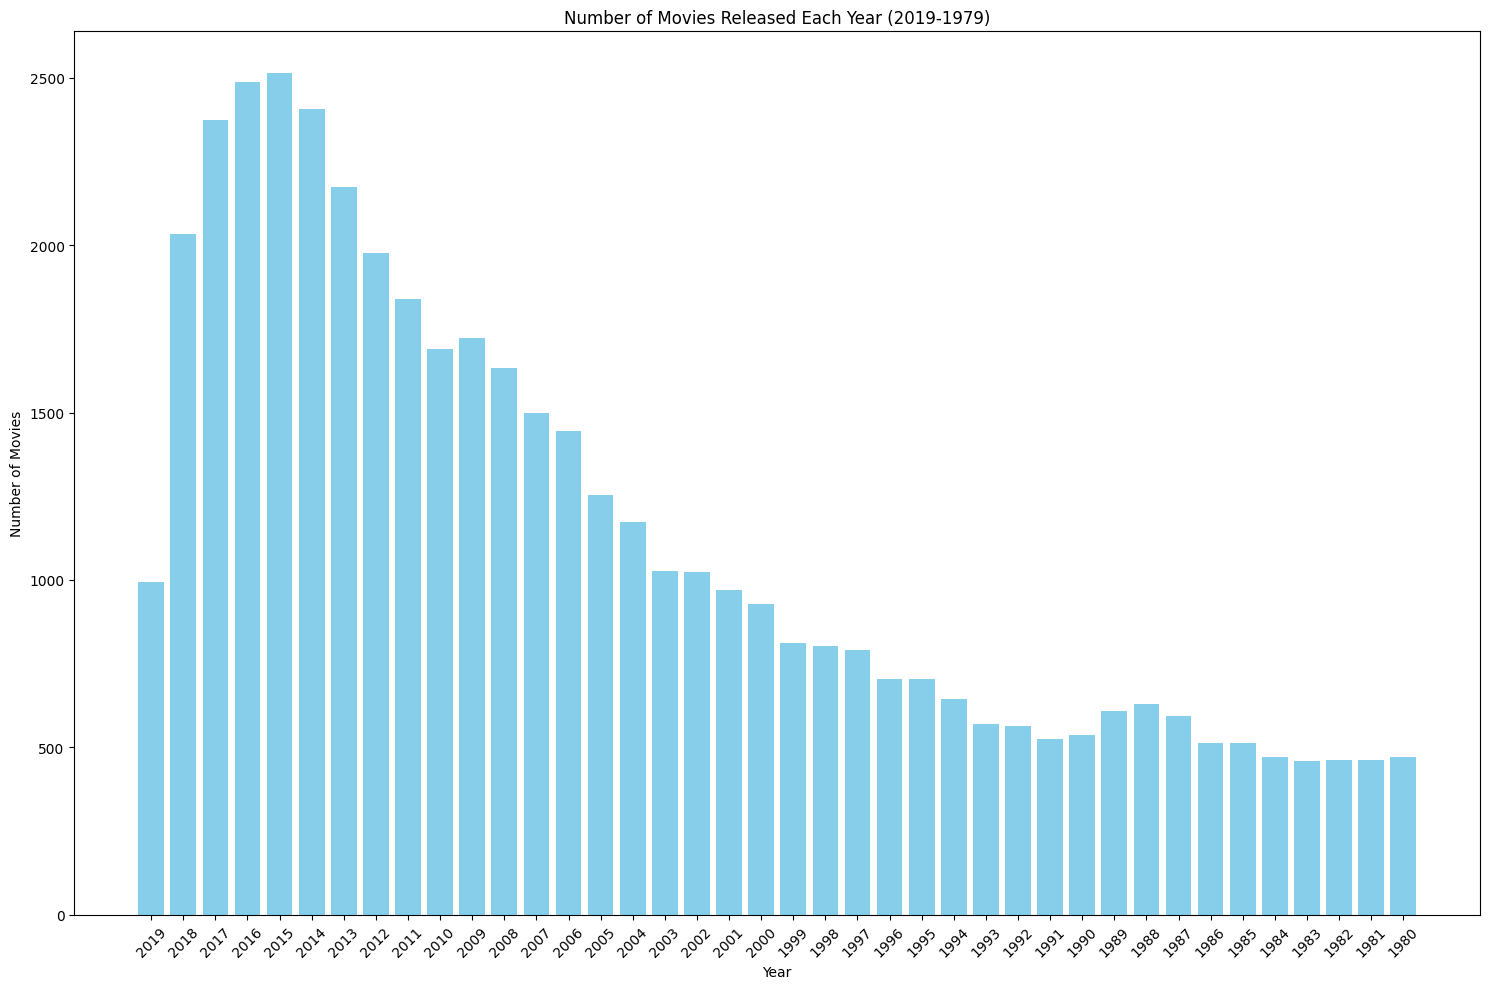

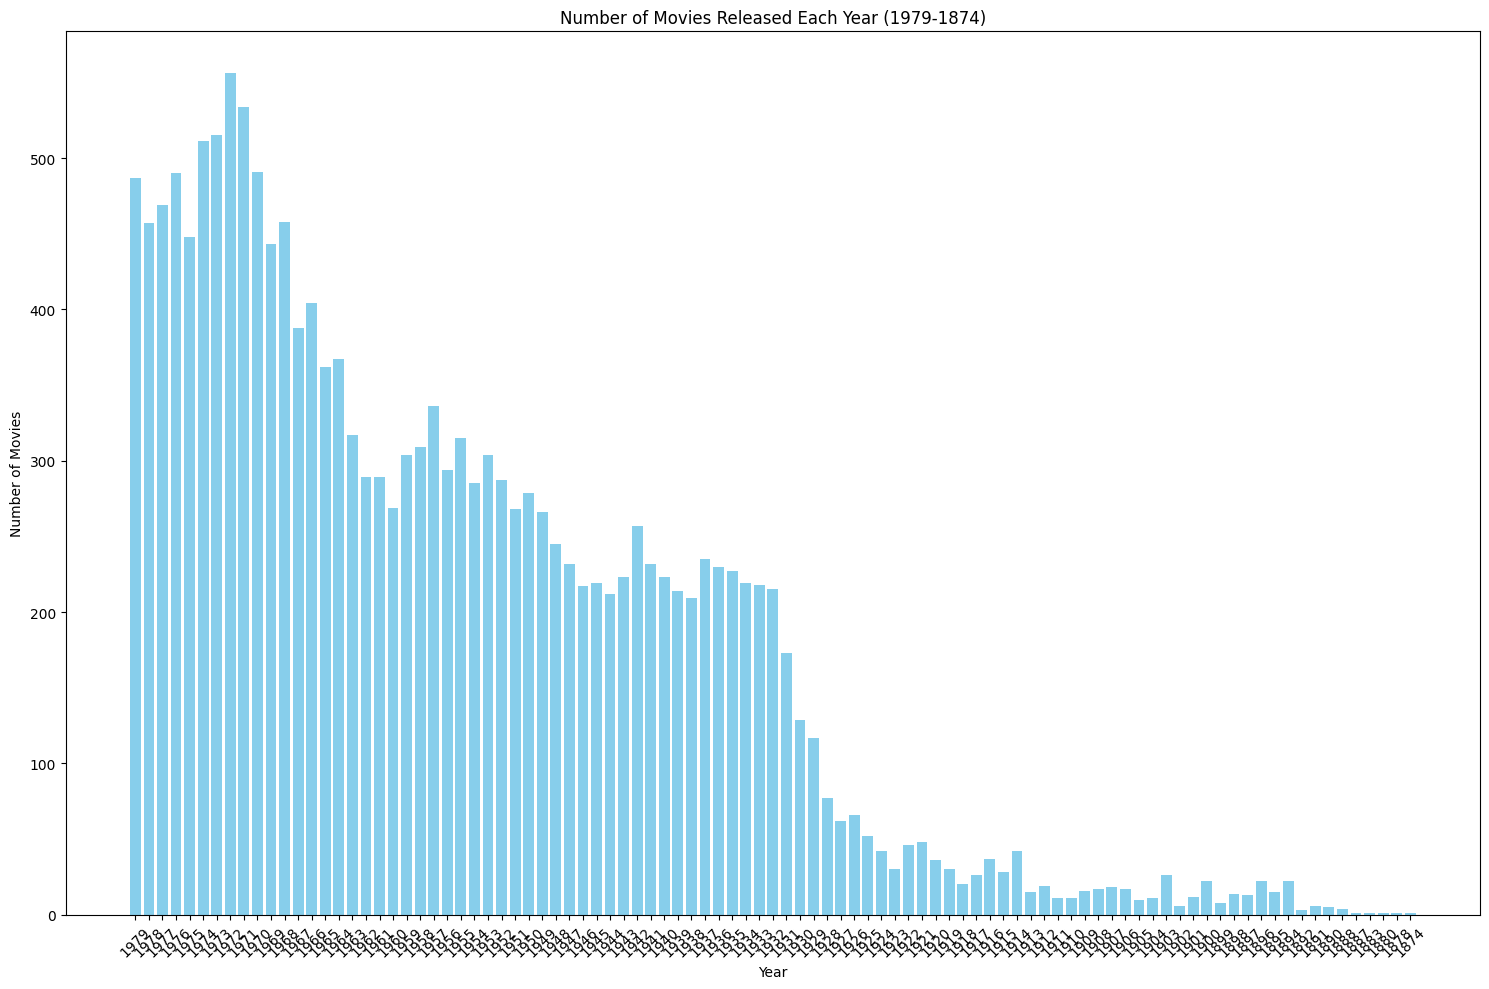

In [12]:
x = 40


plt.figure(figsize=(15, 10))
plt.bar( year_release.index[:x], year_release['count'][:x], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title(f"Number of Movies Released Each Year (2019-{2019-x})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar( year_release.index[x:], year_release['count'][x:], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title(f"Number of Movies Released Each Year ({2019-x}-1874)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

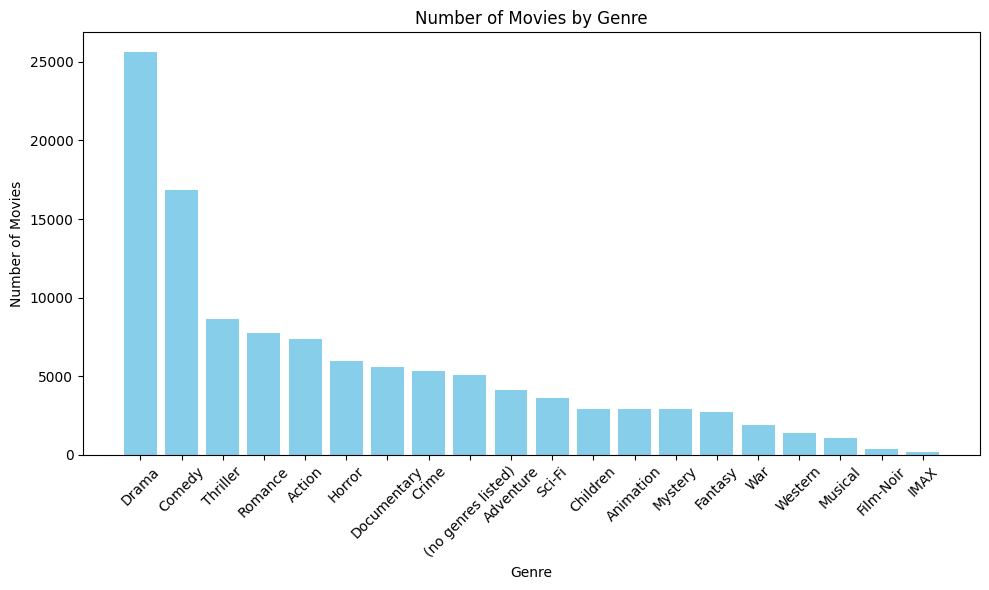

In [13]:
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts['Genre'], genre_counts['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

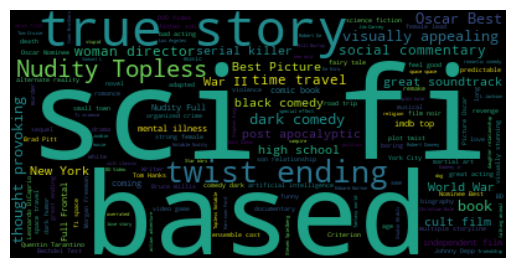

In [17]:
#wordcloud for tags

tags_text = ' '.join(tags.loc[tags['tag'].notna(), 'tag'])
wordcloud = WordCloud().generate(tags_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()